In [1]:
import pandas as pd
#list of useful imports that  I will use
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
import random
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

# Reading Data

In [3]:
data = pd.read_csv(r'C:\Users\SONA\Music\ITDL06-Network Intrusion\DATASET\KDDTrain+.txt')

In [5]:
data 

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [7]:
data.columns

Index(['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14',
       '0.15', '0.16', '0.18', '2', '2.1', '0.00', '0.00.1', '0.00.2',
       '0.00.3', '1.00', '0.00.4', '0.00.5', '150', '25', '0.17', '0.03',
       '0.17.1', '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9', 'normal',
       '20'],
      dtype='object')

In [9]:
data.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [11]:
data.normal.value_counts() 

normal
normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [13]:
#renaming class names
data['normal']=data['normal'].replace(['ipsweep','nmap','portsweep','satan',],'probe')
data['normal']=data['normal'].replace(['back','land','neptune','pod','smurf','teardrop'],'dos')
data['normal']=data['normal'].replace(['buffer_overflow','loadmodule','perl','rootkit'],'u2r')
data['normal']=data['normal'].replace(['ftp_write ','guess_passwd','imap','multihop','phf','spy','warezclient','warezmaster','ftp_write','warezmaster'],'r2l')




In [15]:
data.normal.value_counts() 

normal
normal    67342
dos       45927
probe     11656
r2l         995
u2r          52
Name: count, dtype: int64

In [17]:
#renaming columns
data=data.rename(
columns={
'0':'duration',
'tcp':'protocol_type',
'ftp_data':'service',
'SF':'flag',
 '491':'src_bytes',
 '0.1':'dst_bytes',
'0.2':'land',
 '0.3':'wrong_fragment', 
 '0.4':'urgent',                        
  '0.5':'hot',                        
 '0.6':'num_failed_logins',            
 '0.7':'logged_in',                   
 '0.8':'num_compromised',           
 '0.9':'root_shell',                  
 '0.10':'su_attempted',                 
 '0.11':'num_root',                   
 '0.12':'num_file_creations',           
 '0.13':'num_shells',                   
 '0.14':'num_access_files' ,          
 '0.15':'num_outbound_cmds',         
 '0.16':'is_host_login',            
 '0.17':'is_guest_login',              
 '2':'count',                     
 '2.1':'srv_count',                    
 '0.00':'serror_rate',                
 '0.00.1':'srv_serror_rate',           
 '0.00.2':'rerror_rate',              
 '0.00.3':'srv_rerror_rate',              
 '1.00':'same_srv_rate',            
 '0.00.4':'diff_srv_rate',               
 '0.00.5':'srv_diff_host_rate',      
 '150':'dst_host_count',               
 '25':'dst_host_srv_count',          
 '0.17.1':'dst_host_same_srv_rate',      
  '0.03':'dst_host_diff_srv_rate',       
 '0.17.2':'dst_host_same_src_port_rate', 
 '0.00.6':'dst_host_srv_diff_host_rate',  
 '0.00.7':'dst_host_serror_rate',         
 '0.00.8':'dst_host_srv_serror_rate',     
 '0.05':'dst_host_rerror_rate',         
 '0.00.9':'dst_host_srv_rerror_rate',     
 'normal':'class', 
 '20':'num'})

In [19]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,is_guest_login,dst_host_diff_srv_rate,dst_host_same_srv_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,num
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,dos,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,dos,21


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [23]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,is_guest_login,dst_host_diff_srv_rate,dst_host_same_srv_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [25]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
0.18                           0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [27]:
data.isnull().any()

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
0.18                           False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
s

## Checking the each columns on correlation

In [30]:
data.shape

(125972, 43)

In [32]:
data.drop('num', axis=1, inplace=True)

In [34]:
data.shape

(125972, 42)

In [36]:
data['class'].value_counts()

class
normal    67342
dos       45927
probe     11656
r2l         995
u2r          52
Name: count, dtype: int64

C:\Users\SONA\AppData\Local\Temp\ipykernel_25520\2113349625.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="class", data=data, palette=sns.color_palette("cubehelix", 4))
C:\Users\SONA\AppData\Local\Temp\ipykernel_25520\2113349625.py:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x="class", data=data, palette=sns.color_palette("cubehelix", 4))


Text(0.5, 0, 'Class')

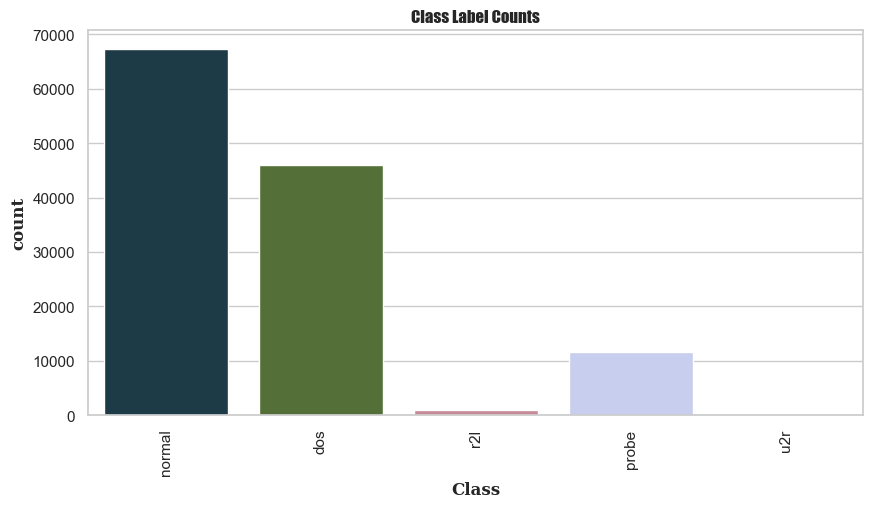

In [38]:
#counts of top 10 drugs
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="class", data=data, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class", {"fontname": "serif", "fontweight":"bold"}) 

In [39]:
#Removing duplicates
data = data.drop_duplicates()

In [42]:
data.shape

(125963, 42)

#  LabelEncoder

In [45]:
data['class'].value_counts()

class
normal    67342
dos       45927
probe     11647
r2l         995
u2r          52
Name: count, dtype: int64

# Resample Data

In [48]:
from sklearn.utils import resample
# Separate majority and minority classes
df_c0  = data[data['class']== 'normal']
df_c1= data[data['class']== 'dos']
df_c2= data[data['class']== 'probe']
df_c3= data[data['class']== 'r2l']
df_c4= data[data['class']== 'u2r']
 
# Downsample majority class and upsample the minority class
df_c0_upsampled = resample(df_c0, replace=True,n_samples=500,random_state=100) 
df_c1_upsampled = resample(df_c1, replace=True,n_samples=500,random_state=100) 
df_c2_upsampled = resample(df_c2, replace=True,n_samples=500,random_state=100) 
df_c3_upsampled = resample(df_c3, replace=True,n_samples=500,random_state=100) 
df_c4_upsampled = resample(df_c4, replace=True,n_samples=500,random_state=100) 
# df_majority_downsampled = resample(df_majority, replace=False,n_samples=2500,random_state=100) 
 
# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_c0_upsampled,df_c1_upsampled,df_c2_upsampled,df_c3_upsampled,df_c4_upsampled])
 
# Display new class counts
df_balanced['class'].value_counts()

class
normal    500
dos       500
probe     500
r2l       500
u2r       500
Name: count, dtype: int64

In [50]:
df_balanced.reset_index(drop=True, inplace=True)


In [52]:
df_balanced.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,is_guest_login,dst_host_diff_srv_rate,dst_host_same_srv_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,http,SF,262,483,0,0,0,0,...,255,1.00,0.00,0.02,0.04,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,242,560,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,234,1931,0,0,0,0,...,255,1.00,0.00,0.01,0.02,0.0,0.0,0.0,0.0,normal
3,0,udp,domain_u,SF,45,134,0,0,0,0,...,214,0.84,0.02,0.00,0.00,0.0,0.0,0.0,0.0,normal
4,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.56,0.88,0.00,0.0,0.0,0.0,0.0,normal


In [54]:
from sklearn.preprocessing import LabelEncoder
columns=data.columns
label_encoder=LabelEncoder()
for cols in columns[:-1]:
   # print(cols)
    if(isinstance(df_balanced[cols].values[0],str)):
        df_balanced[cols]=label_encoder.fit_transform(df_balanced[cols].values)

In [56]:
data1 = df_balanced.sample(frac=1)
data1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,is_guest_login,dst_host_diff_srv_rate,dst_host_same_srv_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
770,0,1,3,5,0,0,0,0,0,0,...,18,0.07,0.06,0.00,0.00,1.00,1.0,0.00,0.00,dos
462,0,1,21,8,237,1228,0,0,0,0,...,255,1.00,0.00,0.01,0.14,0.00,0.0,0.25,0.45,normal
1806,0,1,17,8,334,0,0,0,0,0,...,49,1.00,0.00,1.00,0.14,0.00,0.0,0.00,0.00,r2l
2208,150,1,50,8,1587,6707,0,0,0,1,...,1,1.00,0.00,1.00,0.00,0.00,0.0,0.00,0.00,u2r
614,0,1,43,5,0,0,0,0,0,0,...,13,0.06,0.06,0.00,0.00,0.99,1.0,0.00,0.00,dos


In [58]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]

In [60]:
x.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,is_guest_login,dst_host_diff_srv_rate,dst_host_same_srv_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
770,0,1,3,5,0,0,0,0,0,0,...,255,18,0.07,0.06,0.00,0.00,1.00,1.0,0.00,0.00
462,0,1,21,8,237,1228,0,0,0,0,...,95,255,1.00,0.00,0.01,0.14,0.00,0.0,0.25,0.45
1806,0,1,17,8,334,0,0,0,0,0,...,9,49,1.00,0.00,1.00,0.14,0.00,0.0,0.00,0.00
2208,150,1,50,8,1587,6707,0,0,0,1,...,1,1,1.00,0.00,1.00,0.00,0.00,0.0,0.00,0.00
614,0,1,43,5,0,0,0,0,0,0,...,232,13,0.06,0.06,0.00,0.00,0.99,1.0,0.00,0.00


In [62]:
y.head()

770        dos
462     normal
1806       r2l
2208       u2r
614        dos
Name: class, dtype: object

In [64]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
Y = enc.fit_transform(y)
from keras.utils  import to_categorical
y1 = to_categorical(Y)

In [65]:
enc.classes_

array(['dos', 'normal', 'probe', 'r2l', 'u2r'], dtype=object)

# Splitting Dataset

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y1, test_size=0.3, random_state=42)

In [68]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1750, 41) (750, 41) (1750, 5) (750, 5)


In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [70]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed


In [71]:
import keras
import tensorflow as tf
print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)


Keras version: 3.4.1
TensorFlow version: 2.17.0


In [72]:
# #Reshapind Data
# X_test1 = X_test.values.reshape((len(X_test),41,1))
# X_train1 = X_train.values.reshape((len(X_train),41,1))

In [73]:
X_train.shape

(1750, 41)

In [74]:
Y_train.shape

(1750, 5)

In [75]:
import tensorflow as tf

# LSTM

In [77]:
model = Sequential()
model.add(LSTM(100, input_shape=(41, 1))) 
# model.add(LSTM(100, input_shape=(41)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\SONA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [78]:
model.compile(loss='categorical_crossentropy',
              # optimizer='sgd', # almost same
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [79]:
history1 = model.fit(X_train,Y_train, batch_size= 128,
                    epochs = 30, validation_data = (X_test,Y_test))

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 183ms/step - accuracy: 0.2416 - loss: 1.6028 - val_accuracy: 0.2947 - val_loss: 1.5898
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.2640 - loss: 1.5896 - val_accuracy: 0.3387 - val_loss: 1.5760
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.2967 - loss: 1.5742 - val_accuracy: 0.4093 - val_loss: 1.5600
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.3320 - loss: 1.5604 - val_accuracy: 0.4560 - val_loss: 1.5396
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.3741 - loss: 1.5408 - val_accuracy: 0.4707 - val_loss: 1.5143
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.4096 - loss: 1.5155 - val_accuracy: 0.4733 - val_loss: 1.4828
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.4205 - loss: 1.4823 - val_accuracy: 0.4813 - val_loss: 1.4405
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.4434 - loss: 1.4365 - val_accuracy: 0.

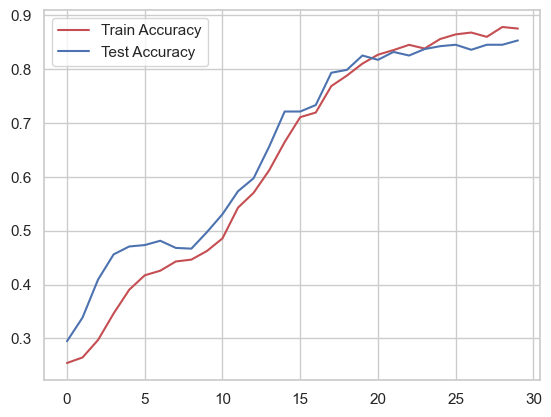

In [80]:
plt.plot(history1.history['accuracy'], 'r')
plt.plot(history1.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

In [94]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8533333539962769


In [95]:
score1 = model.evaluate(X_train, Y_train, verbose=0)
print('Train accuracy:', score1[1])

Train accuracy: 0.8891428709030151


In [112]:
# file_name =r'C:\Users\SONA\Music\ITDL06-Network Intrusion\CODE\front end'

In [114]:
# Assuming your trained model object is named `model`
file_name = r'C:\Users\SONA\Music\ITDL06-Network Intrusion\CODE\front end\model.h5'

# Save the model
model.save(file_name)

print("Model saved successfully.")


Model saved successfully.


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


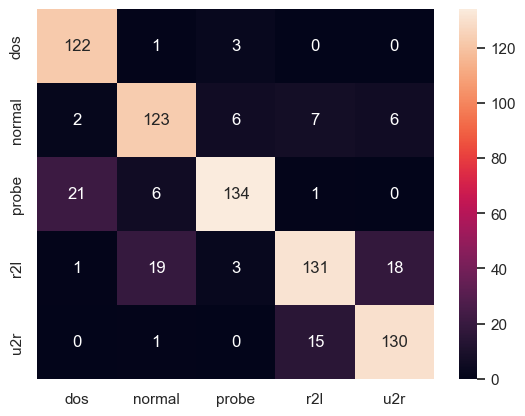

In [116]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model.predict(X_test)),axis = 1),np.argmax(Y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [117]:
enc.classes_

array(['dos', 'normal', 'probe', 'r2l', 'u2r'], dtype=object)

# Prediction

In [121]:
i=3
y_pred = model.predict(X_test[i-1:i])
classes_x=np.argmax(y_pred,axis=1)
act = np.argmax(Y_test[i-1])
print("Predicted class: {}".format(enc.classes_[classes_x]))
print("Actual class: {}".format(enc.classes_[act]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class: ['normal']
Actual class: normal


In [123]:
i=6
y_pred = model.predict(X_test[i-1:i])
classes_x=np.argmax(y_pred,axis=1)
act = np.argmax(Y_test[i-1])
print("Predicted class: {}".format(enc.classes_[classes_x]))
print("Actual class: {}".format(enc.classes_[act]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted class: ['r2l']
Actual class: r2l


In [125]:
i=8
y_pred = model.predict(X_test[i-1:i])
classes_x=np.argmax(y_pred,axis=1)
act = np.argmax(Y_test[i-1])
print("Predicted class: {}".format(enc.classes_[classes_x]))
print("Actual class: {}".format(enc.classes_[act]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted class: ['r2l']
Actual class: r2l


In [127]:
all_model_result = pd.DataFrame(columns=['model','test_accuracy','train_accuracy'])
new = ['LSTM',score[1], score1[1]]
all_model_result.loc[0] = new

# 1-D CNN

In [130]:
model = Sequential()

model.add(Conv1D(filters = 32, kernel_size = 3,activation ='relu', input_shape = (41,1)))
model.add(Conv1D(filters = 32, kernel_size = 3, activation ='relu'))
model.add(Dropout(0.4))

model.add(Conv1D(filters = 32, kernel_size = 3,activation ='relu'))
model.add(Conv1D(filters = 32, kernel_size = 3, activation ='relu'))
model.add(Dropout(0.4))

model.add(Conv1D(filters = 64, kernel_size = 3, activation ='relu'))
model.add(Conv1D(filters = 64, kernel_size = 3, activation ='relu'))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation = "softmax"))
model.summary()

C:\Users\SONA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 39, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 37, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 37, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 35, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 33, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 33, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 31, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 29, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 29, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1856)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         475,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 504,677 (1.93 MB)

 Trainable params: 504,677 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [132]:
model.compile(optimizer = 'rmsprop' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [134]:
history = model.fit(X_train,Y_train, batch_size= 128,
                    epochs = 30, validation_data = (X_test,Y_test))

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.3925 - loss: 495.0181 - val_accuracy: 0.5773 - val_loss: 14.4592
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5042 - loss: 42.9250 - val_accuracy: 0.5840 - val_loss: 12.8171
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.4638 - loss: 116.8664 - val_accuracy: 0.4627 - val_loss: 20.4700
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4663 - loss: 75.4018 - val_accuracy: 0.4627 - val_loss: 13.7875
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4123 - loss: 85.6540 - val_accuracy: 0.4893 - val_loss: 13.8763
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4466 - loss: 161.8723 - val_accuracy: 0.5253 - val_loss: 16.2237
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.4702 - loss: 49.6429 - val_accuracy: 0.5067 - val_loss: 10.9876
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4781 - loss: 173.9624 - val_

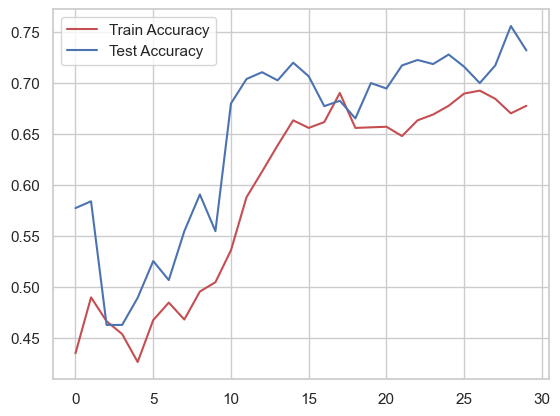

In [135]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

In [136]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.7319999933242798


In [137]:
score1 = model.evaluate(X_train, Y_train, verbose=0)
print('train accuracy:', score1[1])

train accuracy: 0.7491428852081299


In [146]:
# Assuming your trained model object is named `model`
file_name = r'C:\Users\SONA\Music\ITDL06-Network Intrusion\CODE\front endmodel_cnn.h5'

# Save the model
model.save(file_name)

print("Model saved successfully.")

Model saved successfully.


In [148]:
new = ['CNN 1D',score[1], score1[1]]
all_model_result.loc[1] = new

# ANN

In [151]:
# Initialising the ANN

classifier = Sequential()

#Adding the input layer and hidden layer
classifier.add(Dense(input_dim=41, units=45, kernel_initializer='uniform', activation='relu'))

#Adding the second hidden layer
classifier.add(Dense(units=20, kernel_initializer='uniform', activation='relu'))

#Adding the Output Layer
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='sigmoid'))

#Compiling the ANN(Applying Stochastic Gradient)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\SONA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [153]:
history=classifier.fit(X_train, Y_train,batch_size=128, epochs=200,validation_data = (X_test,Y_test))

Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.4064 - loss: 10.7487 - val_accuracy: 0.4480 - val_loss: 2.0933
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4553 - loss: 2.7426 - val_accuracy: 0.3960 - val_loss: 1.5599
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4987 - loss: 2.0087 - val_accuracy: 0.4960 - val_loss: 1.8039
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5036 - loss: 3.2657 - val_accuracy: 0.4707 - val_loss: 1.6182
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5397 - loss: 2.2385 - val_accuracy: 0.4907 - val_loss: 1.2015
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5291 - loss: 2.6547 - val_accuracy: 0.5600 - val_loss: 1.2997
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5498 - loss: 4.2714 - val_accuracy: 0.5413 - val_loss: 2.3360
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5802 - loss: 8.0774 - val_accuracy: 0.578

Epoch 172/200
14/14 [==============================] - 0s 5ms/step - loss: 0.1610 - accuracy: 0.9669 - val_loss: 11.8342 - val_accuracy: 0.9613
Epoch 173/200
14/14 [==============================] - 0s 4ms/step - loss: 0.1564 - accuracy: 0.9663 - val_loss: 11.5303 - val_accuracy: 0.9667
Epoch 174/200
14/14 [==============================] - 0s 4ms/step - loss: 0.1544 - accuracy: 0.9657 - val_loss: 11.0596 - val_accuracy: 0.9613
Epoch 175/200
14/14 [==============================] - 0s 5ms/step - loss: 0.1548 - accuracy: 0.9657 - val_loss: 10.6571 - val_accuracy: 0.9667
Epoch 176/200
14/14 [==============================] - 0s 5ms/step - loss: 0.1495 - accuracy: 0.9663 - val_loss: 10.1351 - val_accuracy: 0.9653
Epoch 177/200
14/14 [==============================] - 0s 4ms/step - loss: 0.1520 - accuracy: 0.9669 - val_loss: 9.8238 - val_accuracy: 0.9680
Epoch 178/200
14/14 [==============================] - 0s 4ms/step - loss: 0.1481 - accuracy: 0.9651 - val_loss: 9.3157 - val_accuracy: 0

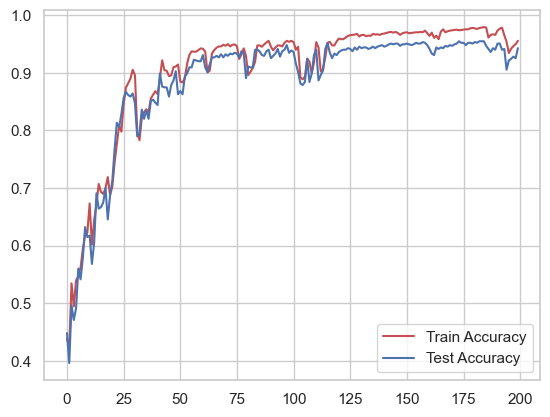

In [154]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

In [159]:
score1 = classifier.evaluate(X_train, Y_train, verbose=0)
print('train accuracy:', score1[1])

train accuracy: 0.9657142758369446


In [161]:
score = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9426666498184204


In [165]:
# Assuming your trained model object is named `model`
file_name = r'C:\Users\SONA\Music\ITDL06-Network Intrusion\CODE\front end\model_ann.h5'

# Save the model
classifier.save(file_name)

print("Model saved successfully.")

Model saved successfully.


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


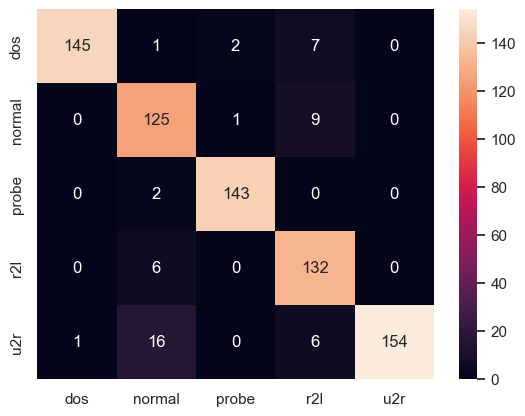

In [167]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((classifier.predict(X_test)),axis = 1),np.argmax(Y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [169]:
enc.classes_

array(['dos', 'normal', 'probe', 'r2l', 'u2r'], dtype=object)

# Prediction

In [172]:
i=8
y_pred = classifier.predict(X_test[i-1:i])
classes_x=np.argmax(y_pred,axis=1)
act = np.argmax(Y_test[i-1])
print("Predicted class: {}".format(enc.classes_[classes_x]))
print("Actual class: {}".format(enc.classes_[act]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: ['r2l']
Actual class: r2l


In [174]:
new = ['ANN', score[1],  score1[1]]
all_model_result.loc[2] = new

# Models Accuracy

In [177]:
all_model_result

,model,test_accuracy,train_accuracy
0,LSTM,0.853333,0.889143
1,CNN 1D,0.732000,0.749143
2,ANN,0.942667,0.965714
